### Импорт библиотек

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

### 1. Загрузка и отображение изображения

Читаем картинку и преобразуем из BGR в RGB

In [2]:
image = cv.cvtColor(cv.imread("image.jpg"), cv.COLOR_BGR2RGB)

Отрисовываем картинку

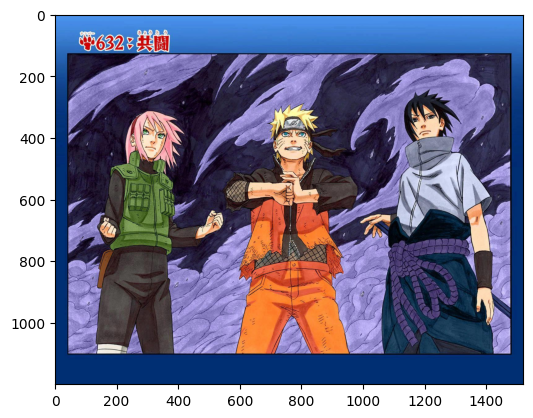

In [3]:
plt.imshow(image)

### 2. Преобразование цветных пространств

Преобразуем картинку из RGB в GRAY

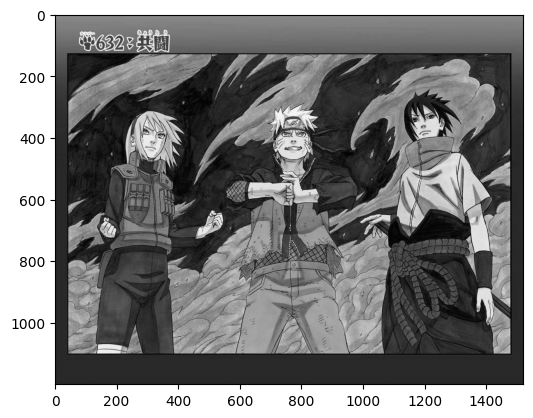

In [4]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')

Преобразуем картинку из RGB в HSV

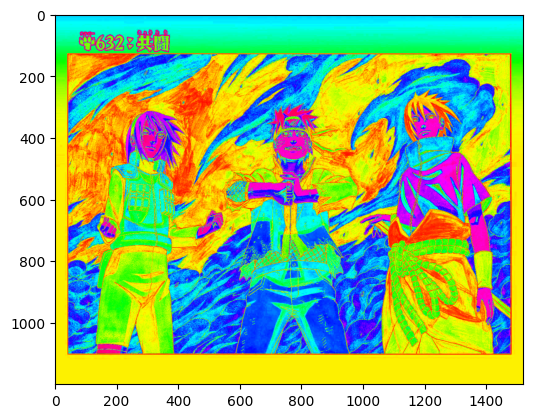

In [5]:
hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
plt.imshow(gray_image, cmap="hsv")

Гистограмма яркости цветного изображения (красный канал)

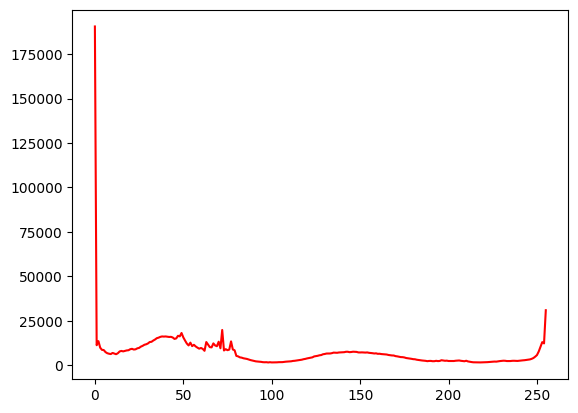

In [6]:
red_hist = cv.calcHist([image],[0],None,[256],[0,256]) 
plt.plot(red_hist, color="r")

Гистограмма яркости цветного изображения (зеленый канал)

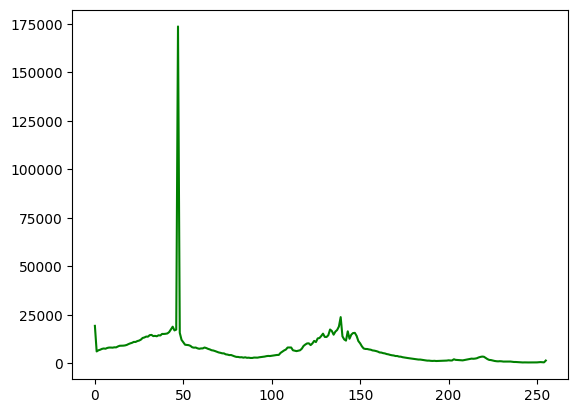

In [7]:
green_hist = cv.calcHist([image],[1],None,[256],[0,256]) 
plt.plot(green_hist, color="g")

Гистограмма яркости цветного изображения (синий канал)

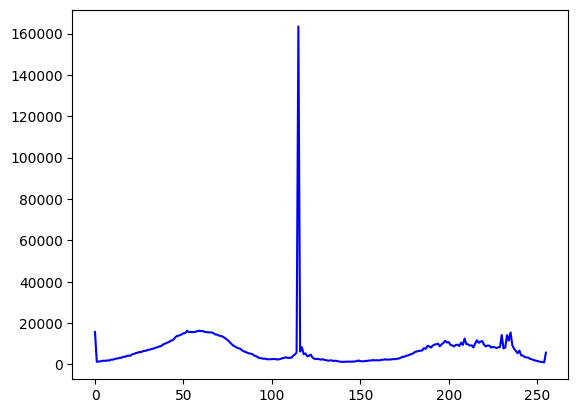

In [8]:
blue_hist = cv.calcHist([image],[2],None,[256],[0,256]) 
plt.plot(blue_hist, color="b")

Гистограмма яркости серого изображения

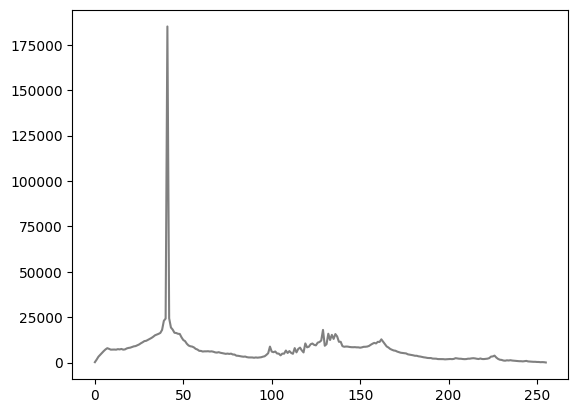

In [9]:
gray_hist = cv.calcHist([gray_image],[0],None,[256],[0,256]) 
plt.plot(gray_hist, color="gray")

### 3. Фильтрация изображений

Перебираем разные $\sigma$ для Гауссового сглаживания и для каждого значения отображаем результат

/tmp/ipykernel_12558/160119994.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


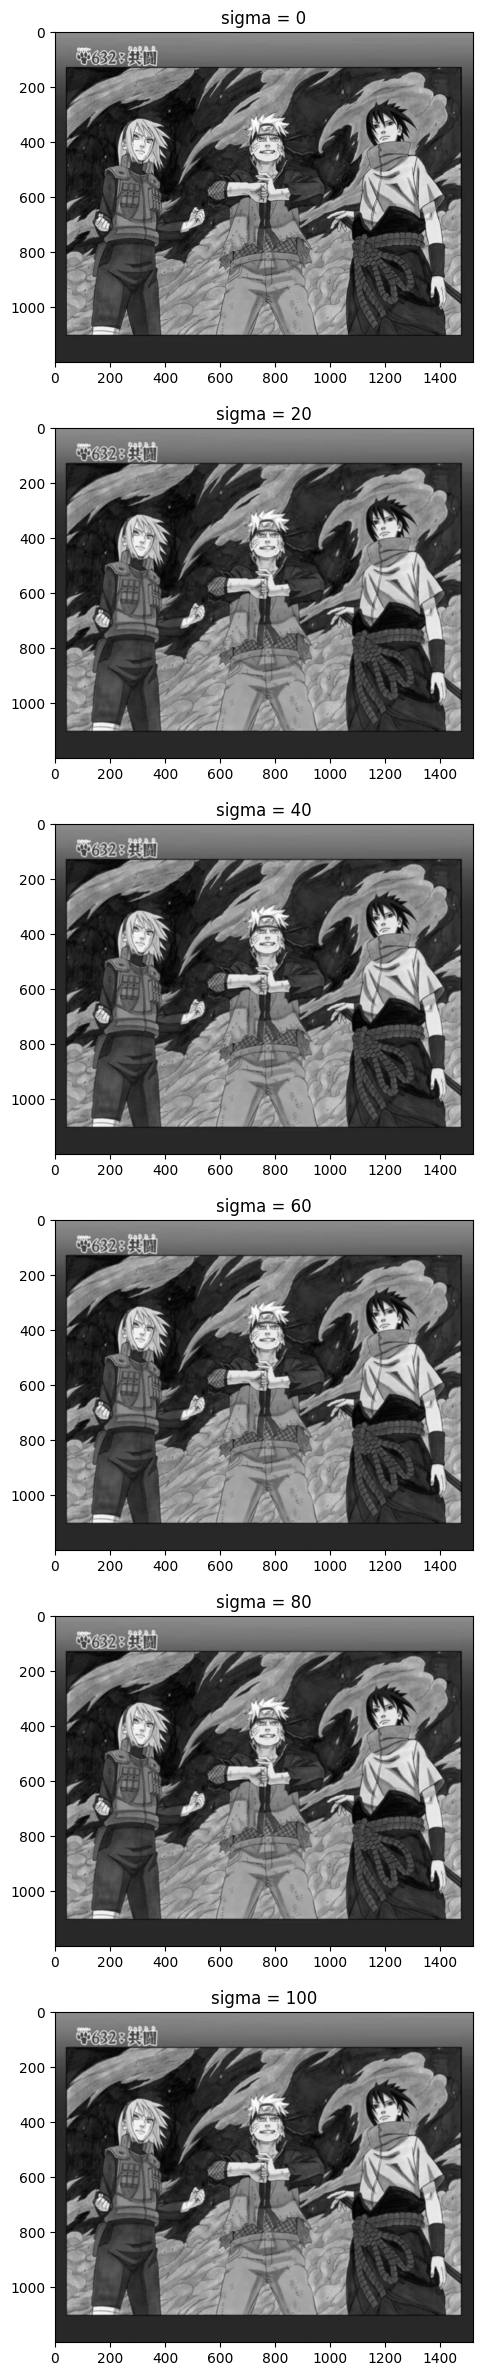

In [10]:
sigmas = list(range(0, 101, 20))
fig, axes = plt.subplots(nrows=len(sigmas), figsize=(10, 30))

for i, sigma in enumerate(sigmas):
    gaussian_blur = cv.GaussianBlur(gray_image,(5,5), sigma)
    axes[i].imshow(gaussian_blur, cmap="gray")
    axes[i].set_title(f"sigma = {sigma}")

fig.show()

Перебираем разные размеры ядра и применяем Медианное сглаживание с последующей отрисовкой результатов

/tmp/ipykernel_12558/930178774.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


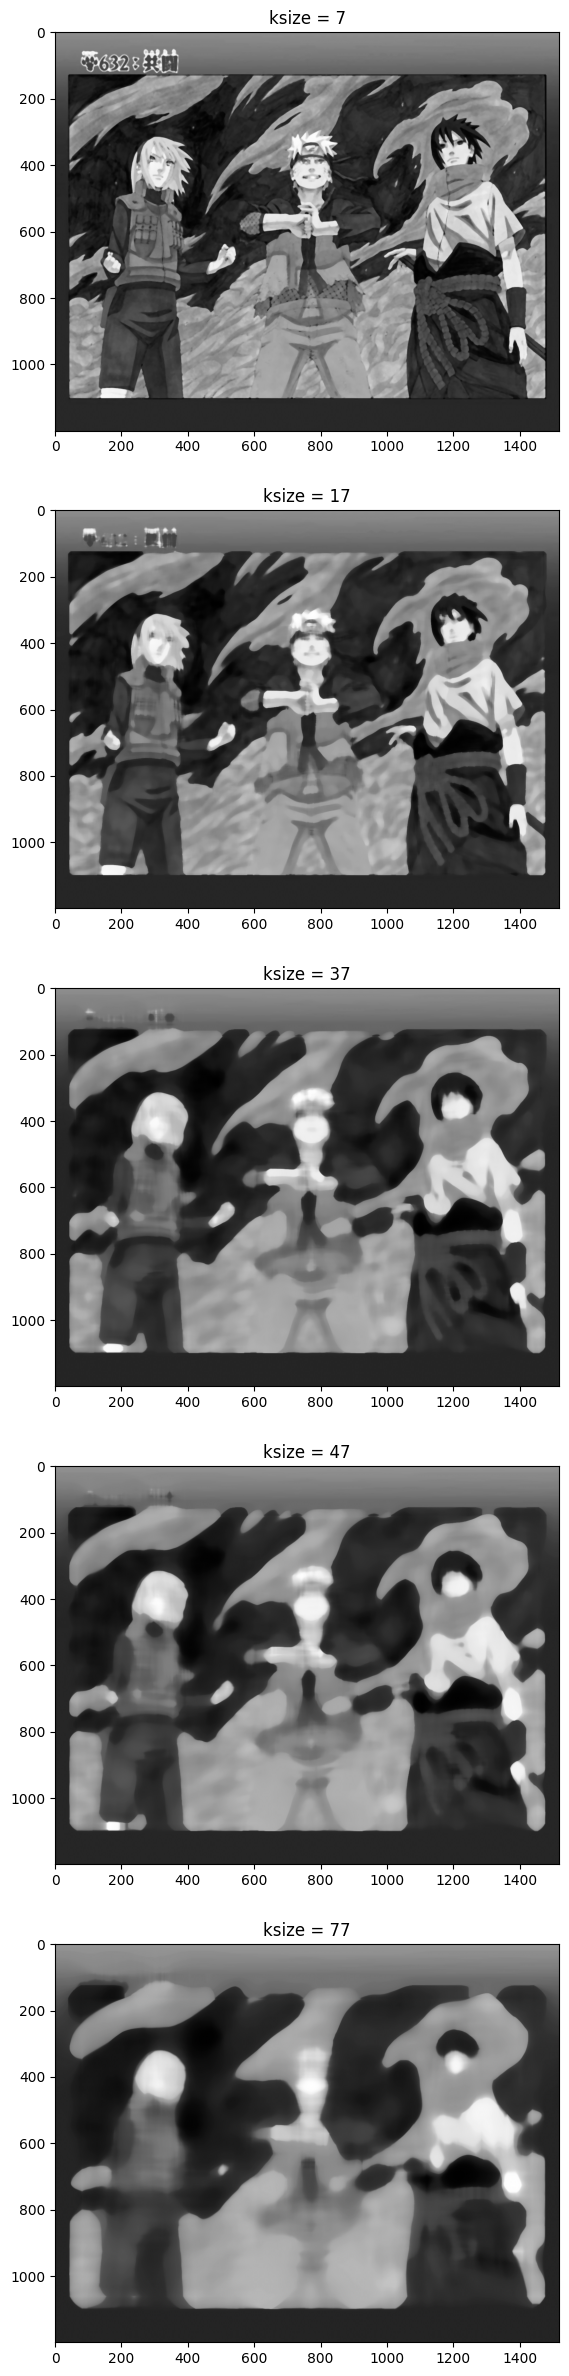

In [11]:
ksizes = [7, 17, 37, 47, 77]
fig, axes = plt.subplots(nrows=len(ksizes), figsize=(10, 30))

for i, ksize in enumerate(ksizes):
    median_blur = cv.medianBlur(gray_image, ksize)
    axes[i].imshow(median_blur, cmap="gray")
    axes[i].set_title(f"ksize = {ksize}")

fig.show()

Применяем фильтр Лапласа

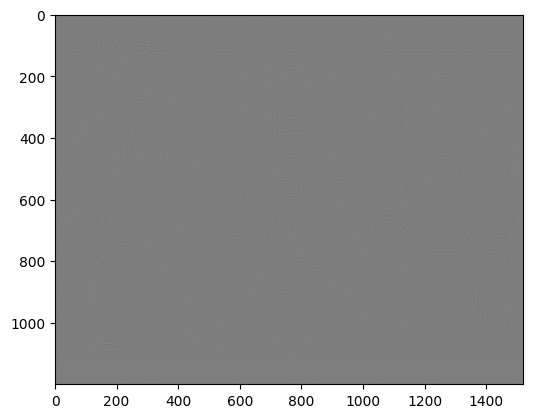

In [12]:
laplacian = cv.Laplacian(gray_image, cv.CV_64F)
plt.imshow(laplacian, cmap="gray")

### Выделение краев и углов

Применяем оператор Собеля

In [13]:
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=7)
sobely = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=7)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-158698.0..155587.0].


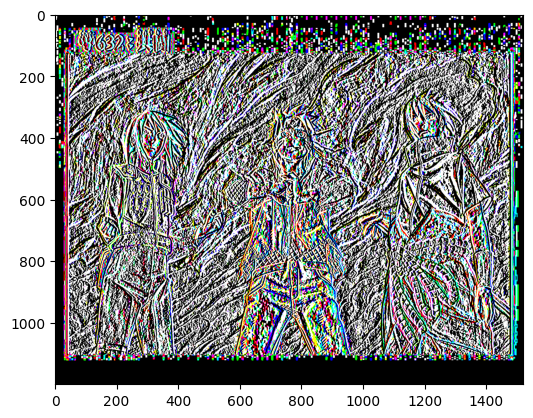

In [14]:
plt.imshow(sobelx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-155840.0..149506.0].


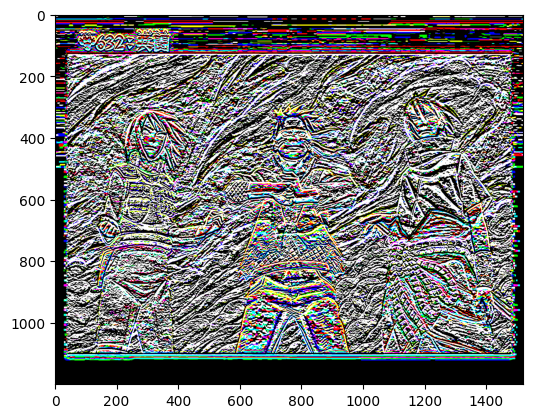

In [15]:
plt.imshow(sobely)

Применяем алгоритм Кэнни для обнаружения краев

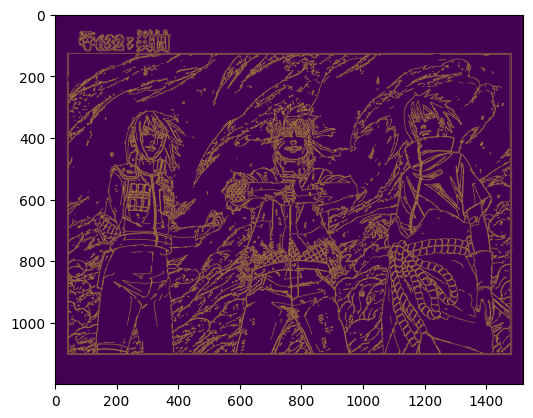

In [16]:
edges = cv.Canny(image, 100, 200)
plt.imshow(edges)

Используем детектор углов Харриса

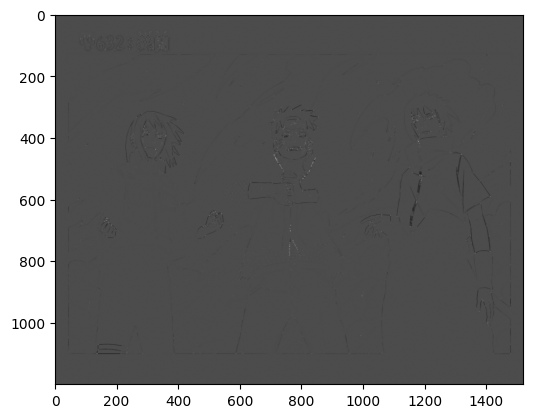

In [17]:
corners = dst = cv.cornerHarris(gray_image, 2, 3, 0.04)
plt.imshow(corners, cmap="gray")

### Морфологические операции

Бинаризация с фиксированным порогом

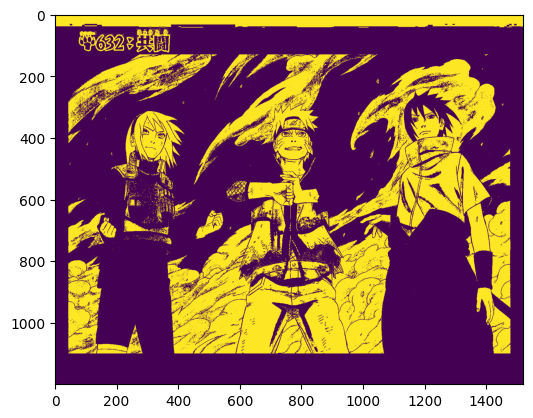

In [18]:
_, binary = cv.threshold(gray_image, 127, 255, cv.THRESH_BINARY)
plt.imshow(binary)

Бинаризация с порогом по Оцу

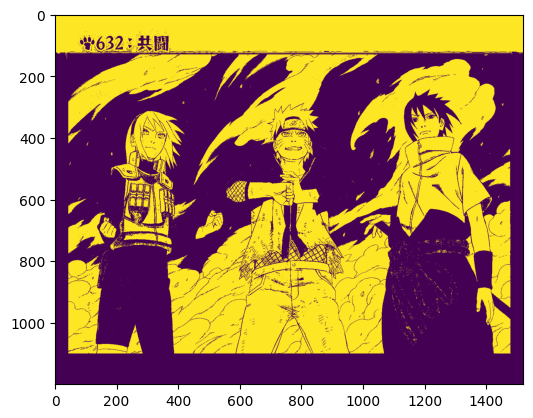

In [19]:
_, otsu_binary = cv.threshold(gray_image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(otsu_binary)

Бинаризация с адаптивным порогом

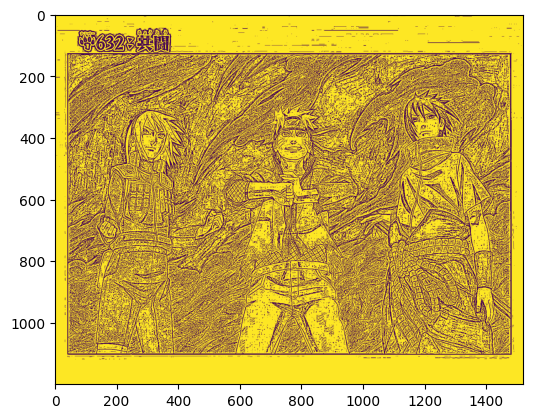

In [20]:
adaptive_binary = cv.adaptiveThreshold(gray_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_binary)

Применение эрозии и дилатации с разными элементами (эллипс, прямоугольник, крест)

/tmp/ipykernel_12558/108714220.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


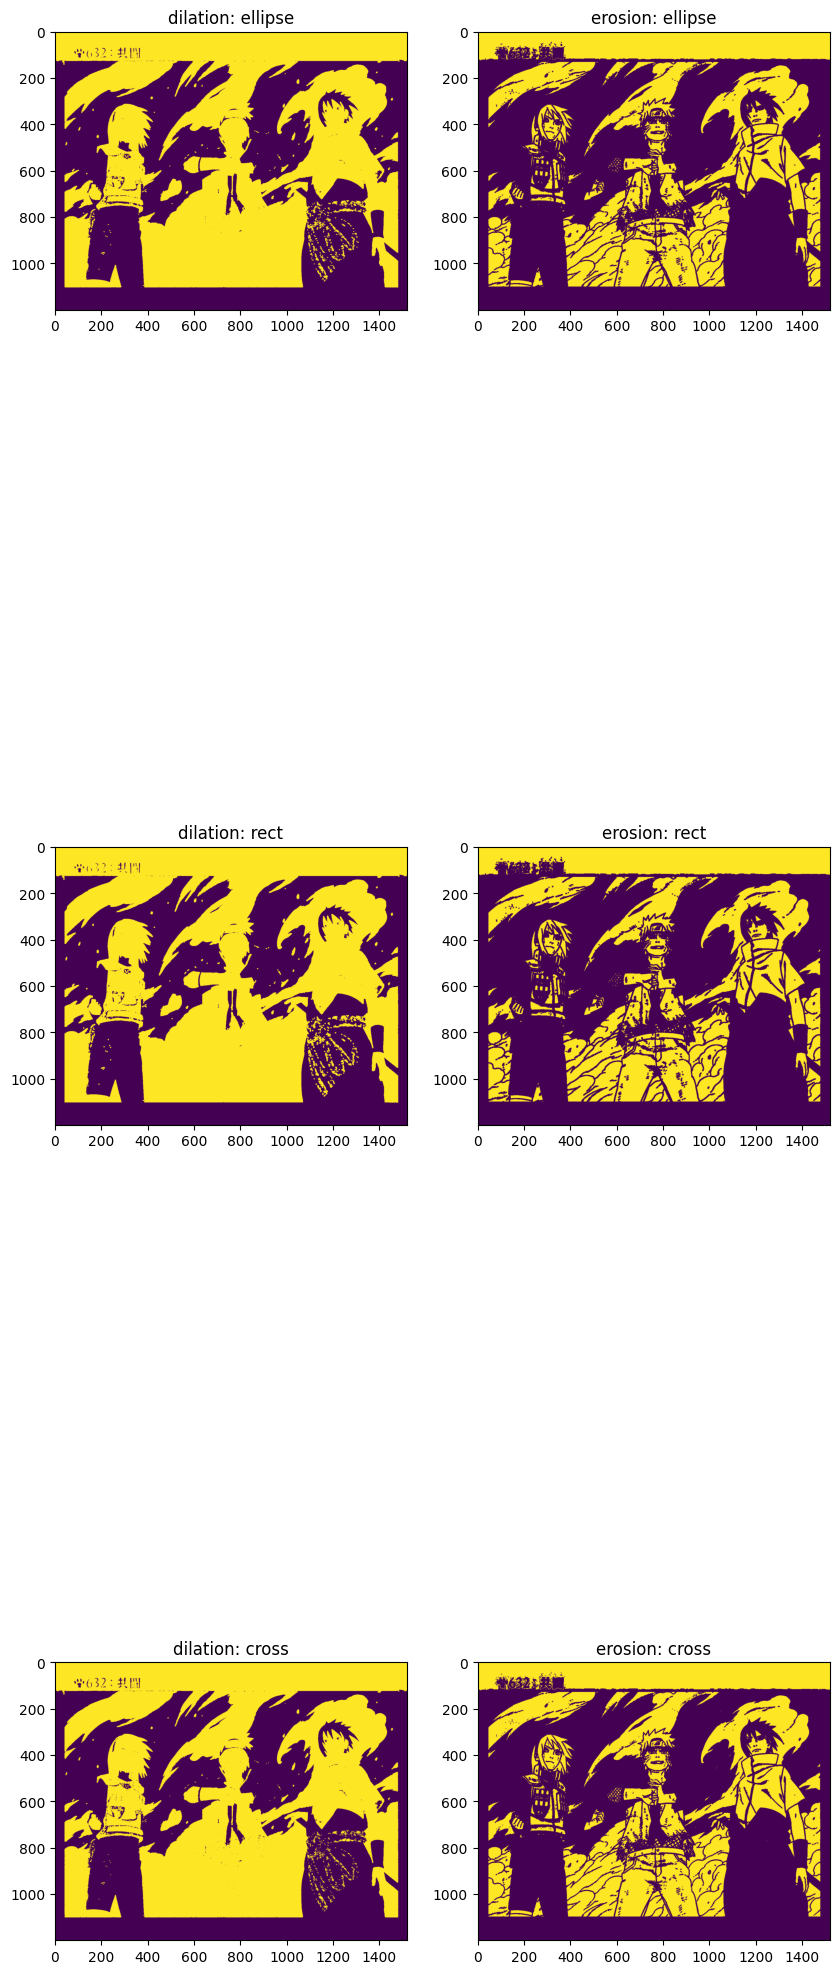

In [21]:
element_types = ["ellipse", "rect", "cross"]
fig, axs = plt.subplots(nrows=len(element_types), ncols=2, figsize=(10, 30))

for i, element_type in enumerate(element_types):
    if element_type == "ellipse":
        element = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))
    elif element_type == "rect":
        element = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
    elif element_type == "cross":
        element = cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))
    
    dilated = cv.dilate(otsu_binary, element, iterations=1)
    eroded = cv.erode(otsu_binary, element, iterations=1)

    axs[i][0].imshow(dilated)
    axs[i][0].set_title(f"dilation: {element_type}")

    axs[i][1].imshow(eroded)
    axs[i][1].set_title(f"erosion: {element_type}")

fig.show()

В результате применения операции эрозии все объекты, меньшие чем структурный элемент, стираются, объекты, соединённые тонкими линиями становятся разъединёнными и размеры всех объектов уменьшаются.  

В результате применения дилатации объекты на изображении становятся больше, их границы утолщаются, а мелкие пробелы и разрывы заполняются. Яркие области расширяются, соединяя близко расположенные элементы.